# Example 1: Hierarchical clustering on dummy data

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

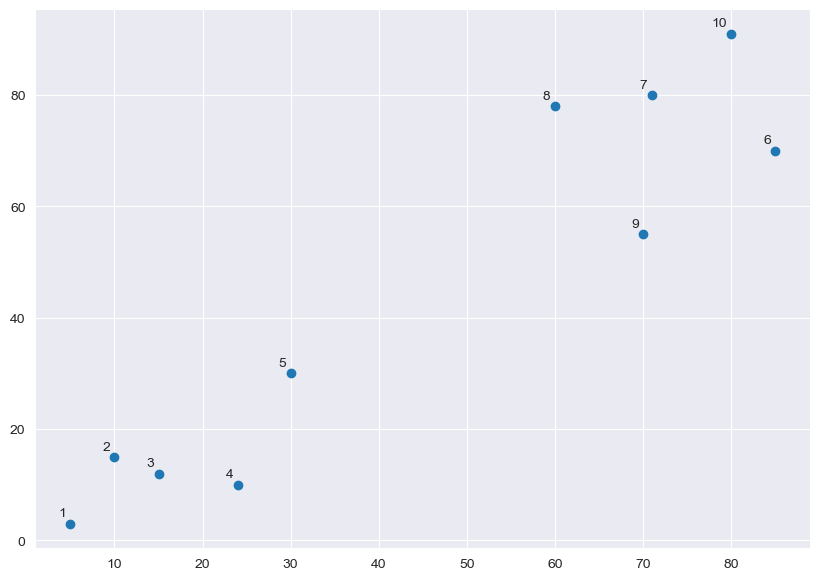

In [2]:
import matplotlib.pyplot as plt
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html

labels = range(1, 11)
plt.figure(figsize=(10, 7))
#tune the subplot layout
#plt.subplots_adjust(bottom=0.1)
#[:,0] for two dimentional arrays gives all values in column 0
plt.scatter(X[:,0],X[:,1], label='True Position')

#an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

#draws the data points in the X numpy array and label data points from 1 to 10.

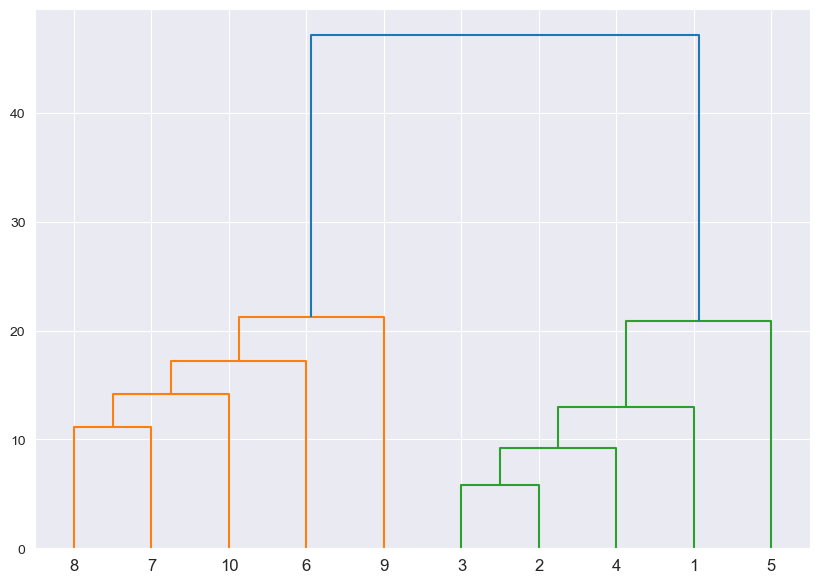

In [3]:
#create dendogram to discover number of clusters
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

#bottom-up (agglomerative) clustering
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

1- The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance.
2- The vertical height of the dendogram shows the Euclidean distances between points.
3- The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster.
4- Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. 
5- The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 
6- the horizontal line is a threshold, which defines the minimum distance required to be a separate cluster. 

In [4]:
import pandas as pd
#import the class for clustering and call its fit_predict method to predict the clusters that each data point belongs to.
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


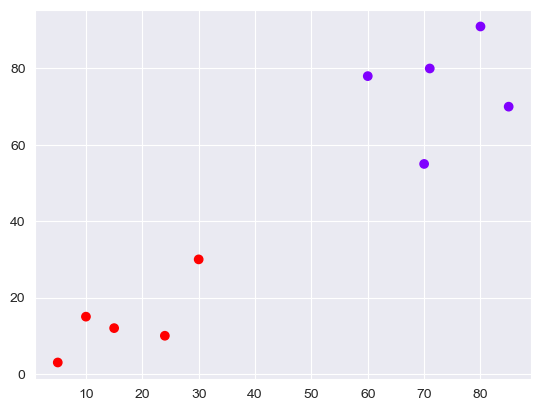

In [5]:
#plot the clusters
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

# Example 2: Hierarchical clustering on real-world data

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.
shopping-data.csv

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [7]:
customer_data = pd.read_csv('shopping-data.csv')

In [8]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
customer_data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


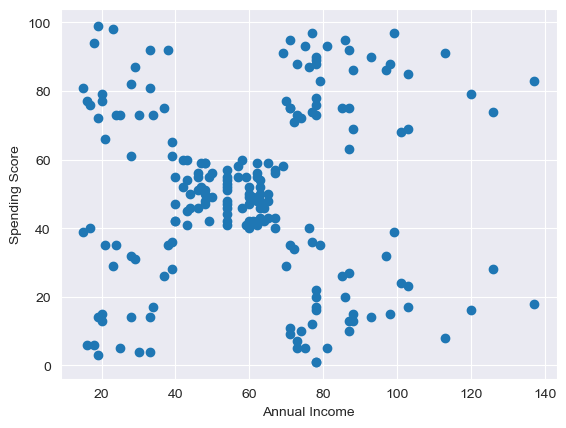

In [10]:
# Bivariate analysis

# Scatter plot
plt.scatter(customer_data.iloc[:,3].values, customer_data.iloc[:,4].values)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

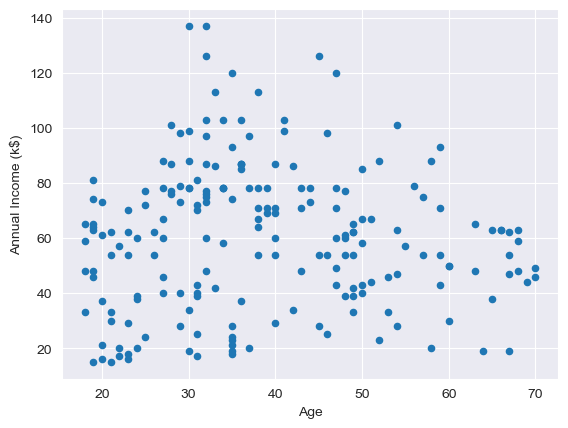

In [11]:
customer_data.plot.scatter(x="Age", y="Annual Income (k$)")
plt.show

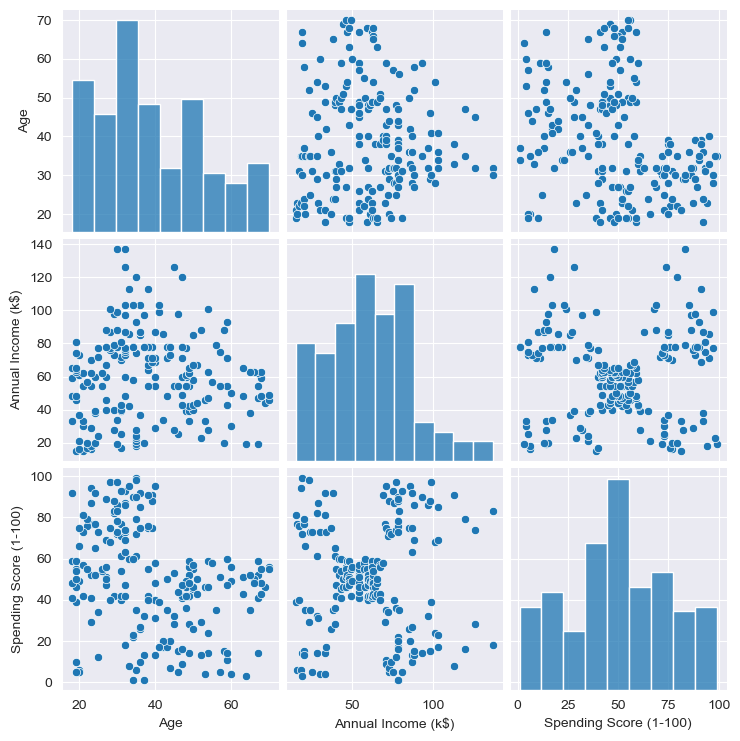

In [12]:
import seaborn as sns
sns.pairplot(data=customer_data, vars=['Age','Annual Income (k$)','Spending Score (1-100)'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

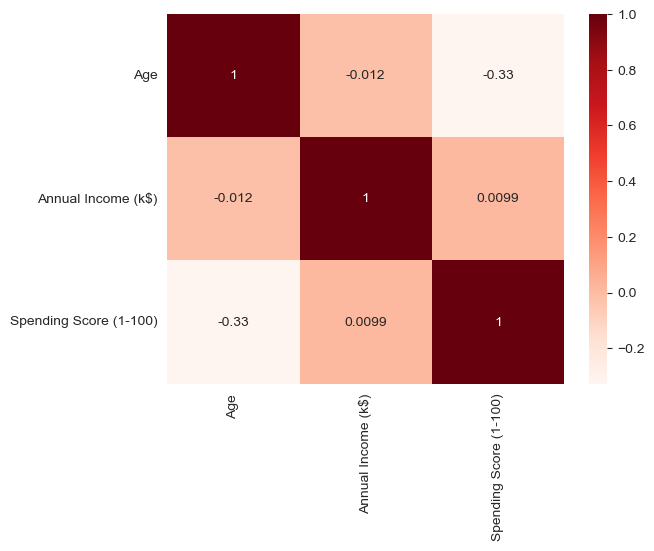

In [13]:
# Correlation matrix
customer_data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

sns.heatmap(customer_data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True, cmap='Reds')
plt.show

In [14]:
# Comparing numerical and categorical data

customer_data.groupby('Genre')['Age'].mean()


Genre
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

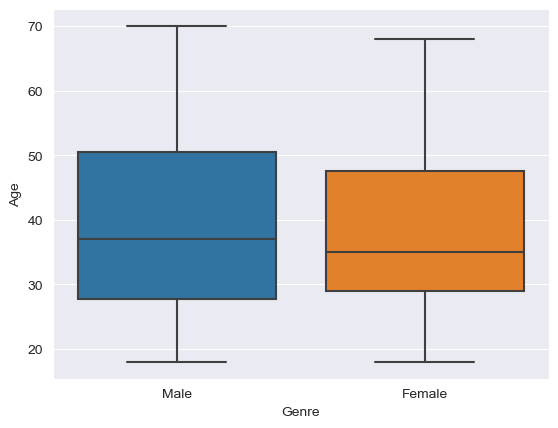

In [15]:
# Boxplot using numerical and categorical data
x=customer_data.Genre
y=customer_data.Age
sns.boxplot(data=customer_data, x="Genre",y="Age")
plt.show

In [16]:
data = customer_data.iloc[:,3:5].values

data.shape

(200, 2)

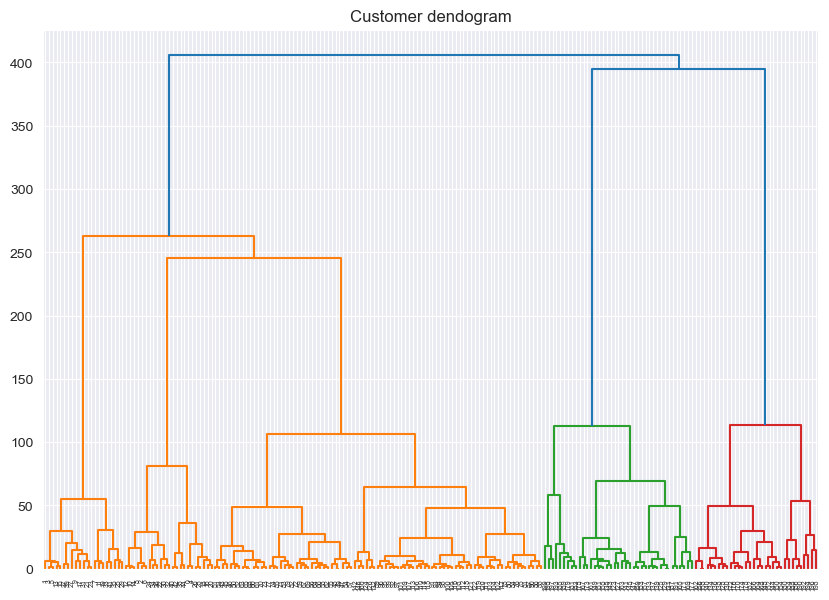

In [17]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Customer dendogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [18]:
from sklearn.cluster import AgglomerativeClustering

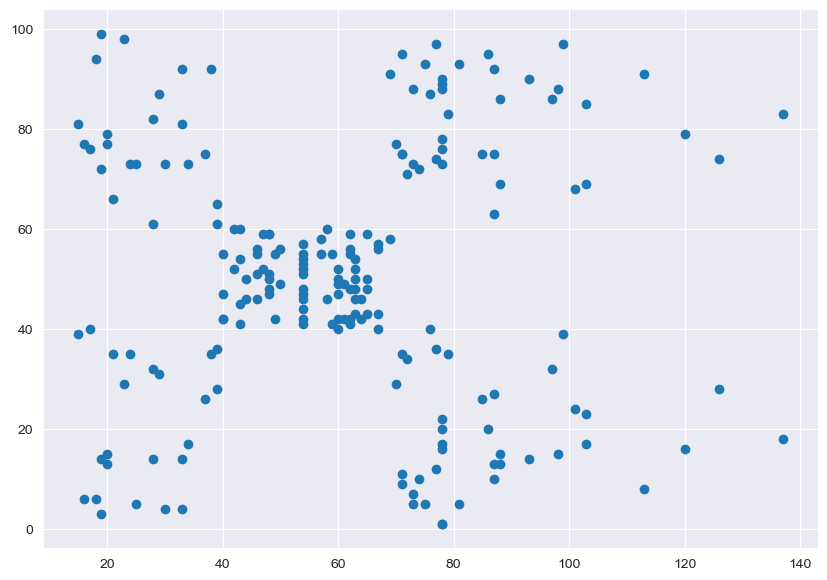

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], cmap="rainbow")

In [20]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Text(0, 0.5, 'Spending Score')

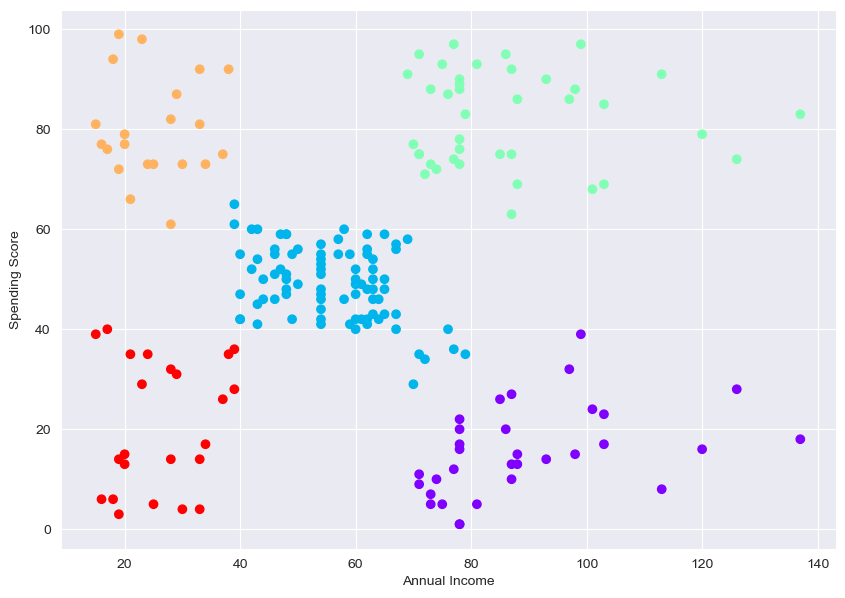

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap="rainbow")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

# Analysis Resutls:

five clusters - 
The data points in the bottom right belong to the customers with high salaries but low spending.
These are the customers that spend their money carefully.
the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.